# Manipulação de Colunas

Para adicionarmos uma coluna à um data.frame, podemos utilizar o comando:


```
data.frame$"nova coluna"
```

Por exemplo:


In [16]:
dtf <- read.table("https://raw.githubusercontent.com/leonardodecuritiba/rdatascience/master/data/abertura-fechamento-empresas.csv",header=T,sep=",",dec=".")
head(dtf)

MES,ABERTURA,FECHAMENTO
<fct>,<int>,<int>
Janeiro,27,16
Fevereiro,3,16
Março,26,15
Abril,23,13
Maio,21,10
Junho,20,8


In [18]:
dtf$diff <- dtf$ABERTURA - dtf$FECHAMENTO
head(dtf)

MES,ABERTURA,FECHAMENTO,diff
<fct>,<int>,<int>,<int>
Janeiro,27,16,11
Fevereiro,3,16,-13
Março,26,15,11
Abril,23,13,10
Maio,21,10,11
Junho,20,8,12


Para exemplificar a forma de como podemos remover uma coluna de um data.frame, vamos utilizar o exemplo anterior e podemos utilizar o seguinte comando:

In [20]:
dtf$diff <- NULL
head(dtf)

MES,ABERTURA,FECHAMENTO
<fct>,<int>,<int>
Janeiro,27,16
Fevereiro,3,16
Março,26,15
Abril,23,13
Maio,21,10
Junho,20,8


# Manipulação de Datas

Para trabalharmos com datas, primeiro instale o pacote **lubridate**

In [21]:
# Instale apenas o lubridate.
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Defina o uso da biblioteca no seu ambiente:

In [0]:
library(lubridate)

Definindo uma string com a data e verificando a classe do seu tipo:

In [23]:
data_inicial <- "21-10-2001"
class(data_inicial)

[1] "character"

Transformando a string em data -> 'Data'

In [24]:
data_date <- dmy(data_inicial)
class(data_date)

[1] "Date"

Capturando o ano da variável do tipo 'Date'

In [25]:
ano_inicial <- year(data_date)
print(ano_inicial)

[1] 2001


Capturando o ano atual, baseado na data do sistema:

In [26]:
ano_atual <- format(Sys.Date(), "%Y")
print(ano_atual)

[1] "2019"


Gerando um vetor contendo anos:

In [27]:
c(ano_inicial:ano_atual)

[1] 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
[16] 2016 2017 2018 2019

# Gráficos

O R consegue plotar desde gráficos bidimensionais simples até
graficos tridimensionais mais complexos por meio de comandos simples.

**plot()**

A função “plot(dados)” gera um gráfico simples, atribuindo pontos em coordenadas cartesianas:

In [0]:
a <- 1:20
print(a)
b <- a^2
print(b)
plot(a,b)

Podemos tornar o gráfico acima contínuo, acrescentando o argumento type=’l’ na função plot().

In [0]:
plot(a,b, type="l")

Existem outros argumentos, para mais dúvidas, cheque:


```
help(plot)
```



É possível também adicionas linhas ou pontos a um gráfico após sua plotagem, utilizando os comandos lines() e points():

In [0]:
a <- 1:20
b <- a^2
plot(a,b)
lines(rev(a),b) #adição de linhas
points(a, 400-b) #adição de pontos

O comando 

```
rev()
```
acima, inverte os valores do vetor.




O R permite que sejam feitas mudanças na representação dos indicadores gráficos (pontos) através do parâmetro “pch=” nos comandos plot() e points().

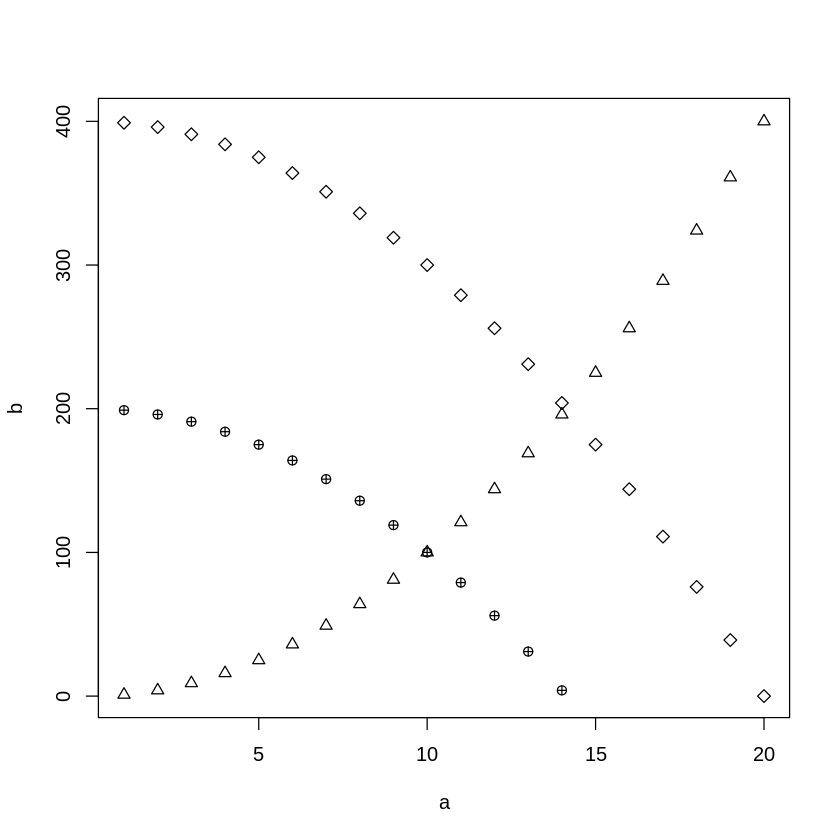

In [36]:
plot(a,b,pch=2)
points(a,400-b, pch=5)
points(a,200-b, pch=10)

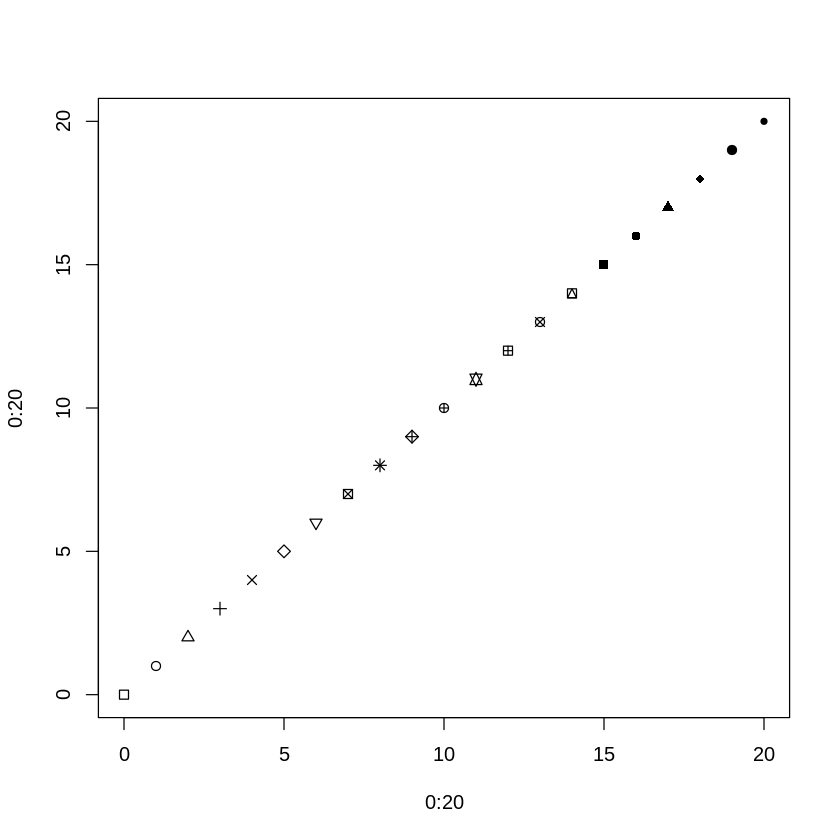

In [37]:
plot(0:20,0:20,pch=0:20)

É possível também realizar mudanças nas caracteristicas das linhas. Os comandos “lwd=” e “lty=” modificam, respectivamente, a largura e o
estilo da linha:

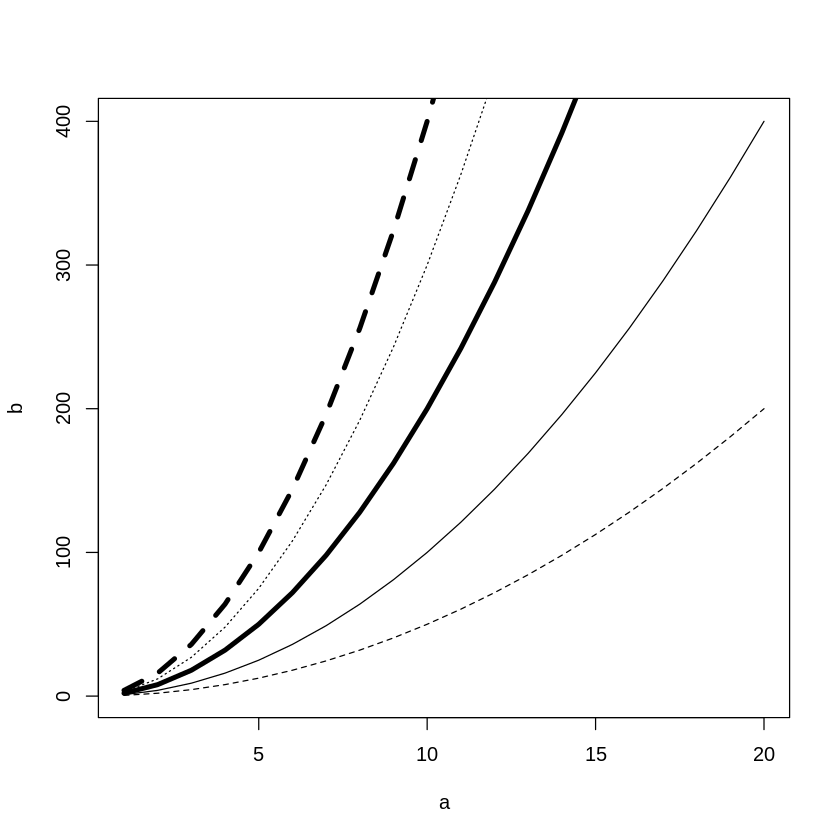

In [38]:
plot(a,b,type="l")
lines(a,2*b,lwd=4)
lines(a,0.5*b,lty=2)
lines(a,3*b,lty=3)
lines(a,4*b,lty=2,lwd=4)

Para alterar a dimensão dos intervalos, pode-se primeiro plotar um gráfico em branco, ajustando os limites da abscissa e da ordenada e depois gerar o gráfico desejado.

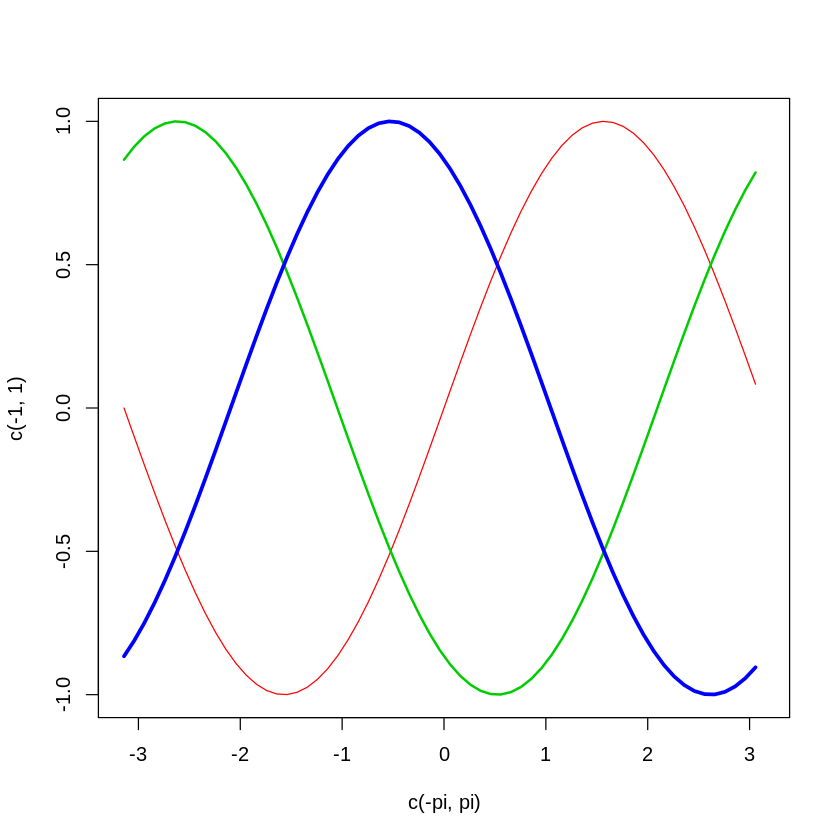

In [40]:
plot(c(-pi,pi),c(-1,1), type="n") #gerando um gráfico em branco
x<-seq(-pi,pi,0.1)
a <- sin(x)
b <- sin(x-2/3*pi)
c <- sin(x+2/3*pi)
lines(x,a,col=2,lwd=1)
lines(x,b,col=3,lwd=2)
lines(x,c,col=4,lwd=3)

Podemos acrescentar o nome dos eixos através dos parâmetros “xlab=” e “ylab=” no comando plot().

O título do texto pode ser adicionado com o parâmetro “main=” no comando plot() ou através do comando title("título","subtítulo").

A legenda do gráfico pode ser acrescida através do comando text() que possui como argumentos as coordenadas do ponto em que se quer colocar a legenda e o texto desejado:

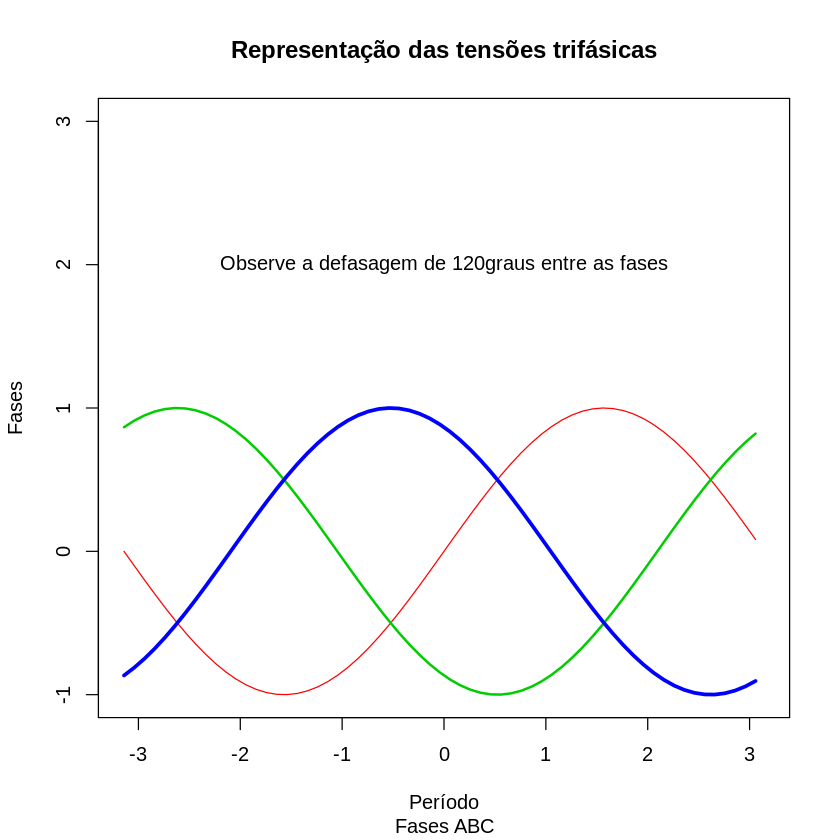

In [41]:
plot(c(-pi,pi),c(-1,3),xlab="Período", ylab="Fases", type="n")
title("Representação das tensões trifásicas","Fases ABC")
lines(x,a,col=2,lwd=1)
lines(x,b,col=3,lwd=2)
lines(x,c,col=4,lwd=3)
text(0,2,"Observe a defasagem de 120graus entre as fases")

Outra utilidade do comando text() é acrescentar textos às coordenadas cartesianas x e y:


```
text(x,y,"etiquetas")

```


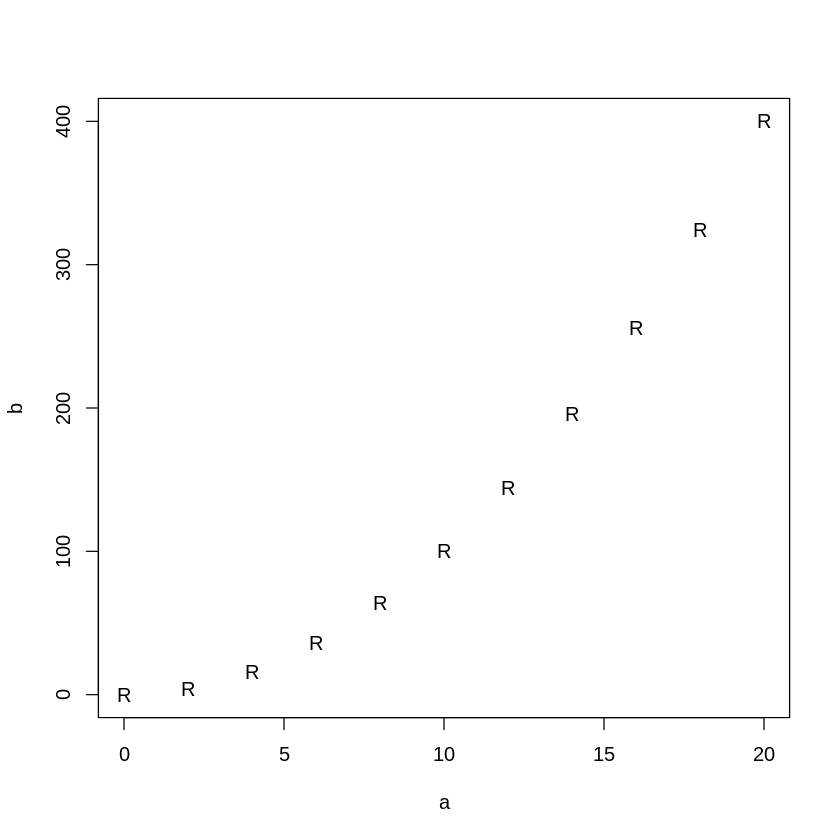

In [42]:
a <- seq(from=0, to=20, by=2); b <- a^2
plot(a,b,type="n") #plota um gráfico vazio
text(a,b,"R") #aplica a etiqueta no local dos pontos

**Salvando Gráficos**

Os gráficos podem ser salvos imediatamente ao serem gerados.
Existem vários formatos em que o R pode salvar imagens gráficas. Alguns deles são: JPEG, BMP, PDF, TIFF, PNG.

Atenção, você precisa executar esses comandos 

In [0]:
jpeg(file=’figure.jpeg’) #figure é o nome do arquivo imagem
plot(a,b) #gráfico que estou salvando
dev.off() #fecha a janela gráfica automaticamente

**Gráficos de Análise Descritiva**

Apresentaremos agora três gráficos fundamentais na análise descritiva dos dados:
histograma, gráfico de barras e gráfico de caixas. São reconhecidos no R pelos nomes hist, barplot e boxplot.

**Histograma**


```
hist(dados,nclass=k) #k é o número de classes do histograma
```



 [1]  96  96 102 102 102 104 104 108 126 126 128 128 140 156 160 160 164 170 115
[20] 121 118 142 145 145 149 112 152 144 122 121 133 134 109 108 107 148 162  96


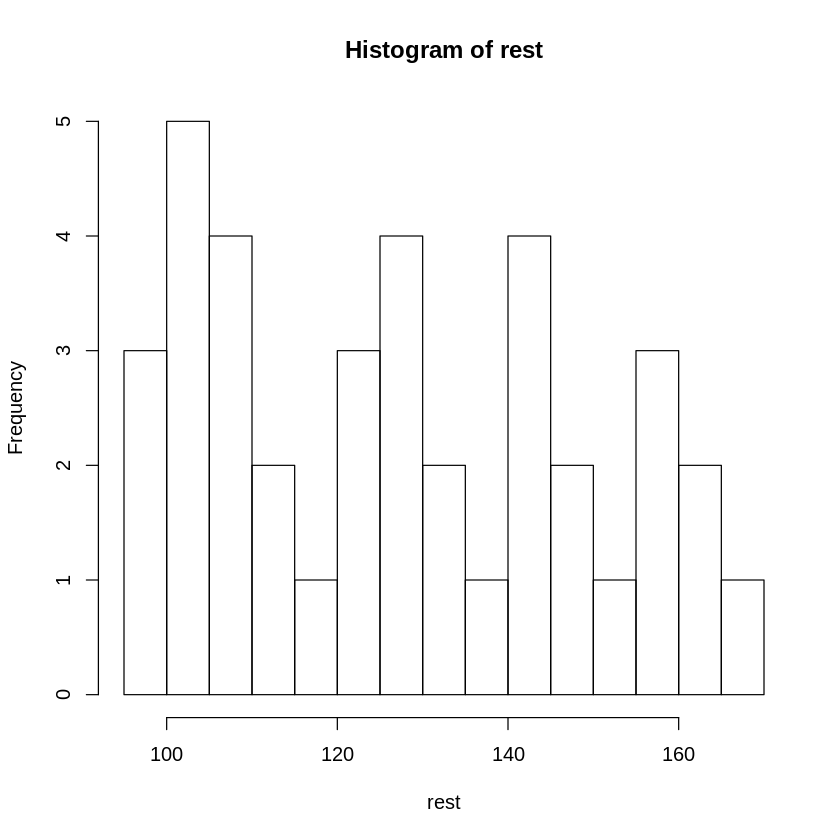

In [44]:
rest <- c(96,96,102,102,102,104,104,108,
+ 126,126,128,128,140,156,160,160,164,170,
+ 115,121,118,142,145,145,149,112,152,144,
+ 122,121,133,134,109,108,107,148,162,96)
print(rest)
hist(rest,nclass=12)

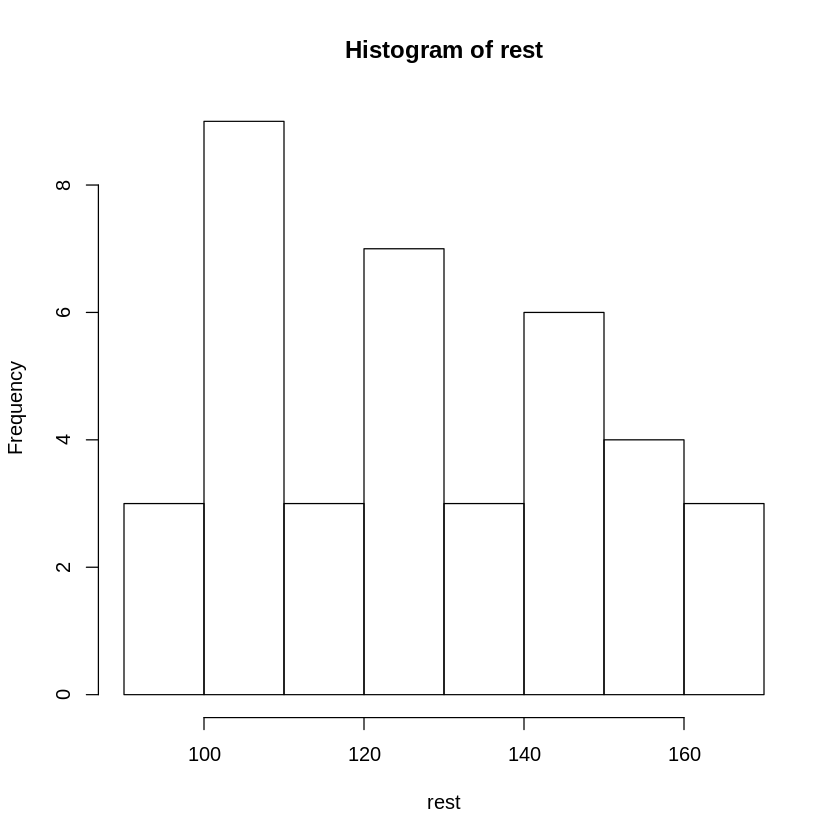

In [45]:
hist(rest,nclass=6) #agora com k=6

**Barplot**
A função barplot() produz gráfico de barras, onde cada barra representa a medida de cada elemento de um vetor, ou seja, as barras são proporcionais com a “dimensão” do elemento.


```
barplot(x, col=" ", legend.text=" ", xlab=" ",ylab=" ")
```

**x** - é o vetor ou arquivo de dados;

**col**=” ” - define-se a cor de exibição do gráfico de barras;

**legend.text**=” ” - legenda do gráfico (o que representa a altura dos gráficos);

**xlab**=” ” e **ylab**=” ” - nome das grandezas expressas nos eixos x e y, respectivamente.


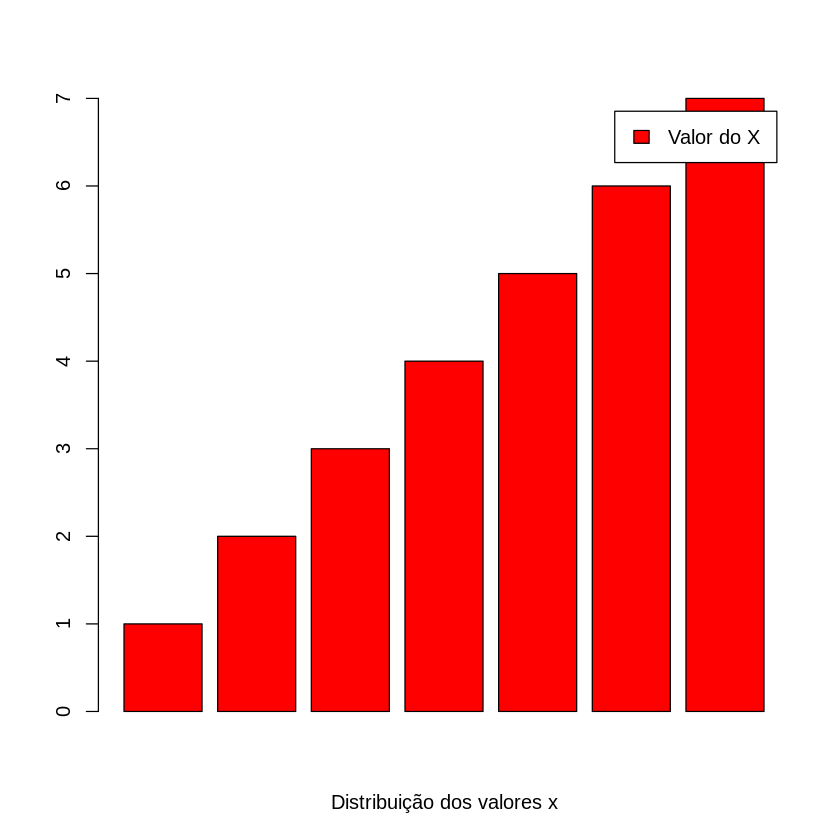

In [46]:
x <- c(1,2,3,4,5,6,7)
barplot(x,xlab="Distribuição dos valores x",col="red", legend.text="Valor do X")

# Gráfico de Pizza

Gráficos de pizza exibem dados como proporção de um todo o que permite fazer comparações entre grupos.
Quando um dado é solto em um gráfico de pizza, o gráfico calcula a porcentagem de cada valor em relação a toda pizza.


```
pie(dados,opções)
```



In [0]:
a<-c(0.12, 0.3, 0.26, 0.16, 0.04, 0.12)
names(a)<-c("a","b","c","d","e","f") #definindo uma nomenclatura para cada valor de a
pie(a,col = c("red","blue","green","gray", "brown", "black")) #definindo as cores para cada porção do gráfico